In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shp
% matplotlib inline

In [8]:
pd.options.display.max_columns = None
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']

# Loading the dataset

In [40]:
overview = gpd.read_file('overview.geojson')

In [41]:
overview.columns

Index(['NAME', 'TOTPOP_CY', 'x', 'y', 'Total injuries', 'Total mortalities',
       'Number of traffic accidents',
       'Number of people involved in traffic accidents',
       'Number of Accidents including damages',
       'Number of Accidents including injuries',
       'Number of Accidents including mortalities',
       'Percentage of Accidents including damages',
       'Percentage of Accidents including injuries',
       'Percentage of Accidents including mortalities',
       'Accidents per 1000 population',
       'Involvment in traffic accidents per 1000 population',
       'Injuries 1000 population', 'Mortalities per 1000 population',
       'geometry'],
      dtype='object')

## Fixing the dataset so its per 10,000 population istead of per 1000

In [42]:
overview[['Accidents per 1000 population',
       'Involvment in traffic accidents per 1000 population',
       'Injuries 1000 population', 'Mortalities per 1000 population']] = overview[['Accidents per 1000 population',
       'Involvment in traffic accidents per 1000 population',
       'Injuries 1000 population', 'Mortalities per 1000 population']]*10

overview.rename(columns={'Accidents per 1000 population':'Accidents per 10,000 population',
       'Involvment in traffic accidents per 1000 population':'Involvment in traffic accidents per 10,000 population',
       'Injuries 1000 population':'Injuries 10,000 population',
        'Mortalities per 1000 population':'Mortalities per 10,000 population'}, inplace = True)

overview.head()

,NAME,TOTPOP_CY,x,y,Total injuries,Total mortalities,Number of traffic accidents,Number of people involved in traffic accidents,Number of Accidents including damages,Number of Accidents including injuries,Number of Accidents including mortalities,Percentage of Accidents including damages,Percentage of Accidents including injuries,Percentage of Accidents including mortalities,"Accidents per 10,000 population","Involvment in traffic accidents per 10,000 population","Injuries 10,000 population","Mortalities per 10,000 population",geometry
0,Makkah,3261577,-398222.616706,2.366203e+06,3400.0,609.0,44915.0,88472.0,43146.0,1311.0,458.0,96.061449,2.918847,1.019704,137.709458,271.255285,10.424405,1.867195,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...
1,Aseer,2264096,-352045.193083,2.127645e+06,2192.0,696.0,25964.0,50085.0,24608.0,771.0,585.0,94.777384,2.969496,2.253120,114.677116,221.214118,9.681568,3.074075,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...
2,Tabouk,962936,-698604.846811,3.091249e+06,977.0,293.0,10034.0,9905.0,9247.0,573.0,214.0,92.156667,5.710584,2.132749,104.202148,102.862496,10.146053,3.042778,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...
3,Jazan,1643752,-377562.520722,1.923485e+06,2112.0,563.0,19572.0,33268.0,18046.0,1098.0,428.0,92.203147,5.610055,2.186797,119.069057,202.390628,12.848654,3.425091,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...
4,Al-Baha,500452,-509430.926111,2.256117e+06,935.0,111.0,1764.0,3918.0,1193.0,490.0,81.0,67.630385,27.777778,4.591837,35.248136,78.289227,18.683110,2.217995,"POLYGON Z ((-497258.929 2331363.256 0.000, -49..."


# Plotting the data

## Injuries

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


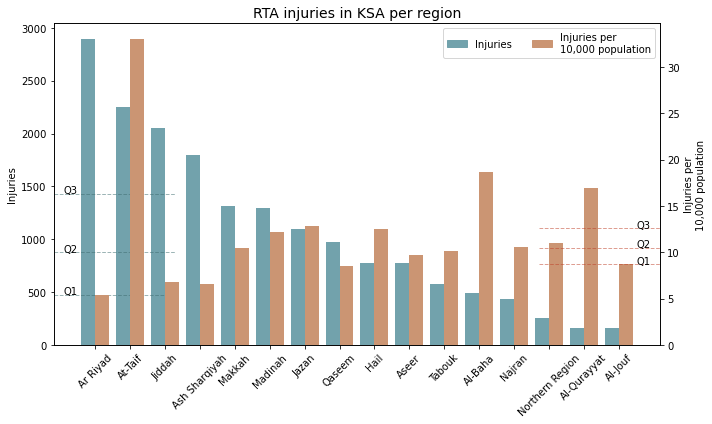

In [117]:
variable = 'Injuries'
to_plot = ['Injuries 10,000 population','Number of Accidents including injuries']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (10,24/4))
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax2 = ax.twinx()

width = 0.4
xticks = np.arange(len(overview))+1
ticks1 = xticks - (width/2)
ticks2 = xticks + (width/2)
xlabels = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,'NAME'].values

ax.bar(x = ticks1, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[1]],
       color = colors[1], width = width, zorder = 2)
ax2.bar(x = ticks2, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[0]],
       color = colors[2], width = width, zorder = 2)

ax.set_xticks(xticks)
ax.set_xticklabels(labels = xlabels, Rotation= 45)
ax.set_ylabel(variable)
ax2.set_ylabel(variable+' per\n10,000 population')

import matplotlib.patches as mpa
labels = [variable , variable+' per\n10,000 population']
legend_handels = []
for x in np.arange(len(labels)):
    legend_handels.append(mpa.Patch(color= colors[x+1], label=labels[x]))

plt.legend(handles=legend_handels, ncol = 2, loc = 1)

for i,q in zip([0.25,0.5,0.75], ['Q1','Q2','Q3']):
    ax.axhline(y = overview[to_plot[1]].quantile(i), color = colors[0], label = q,
               linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmax = 0.2)
    ax.annotate(text = q , xy=(0.5,overview[to_plot[1]].quantile(i)),ha='right')
    ax2.axhline(y = overview[to_plot[0]].quantile(i), color = colors[4], label = q,
                linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmin = 0.8)
    ax2.annotate(text = q , xy=(16.5,overview[to_plot[0]].quantile(i)),ha='left')

plt.title('RTA '+ variable.lower()+' in KSA per region', size =14)
plt.tight_layout()
plt.savefig('./output/New_'+variable.lower()+'.jpg',dpi = 300)
plt.show()

## Mortalities

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


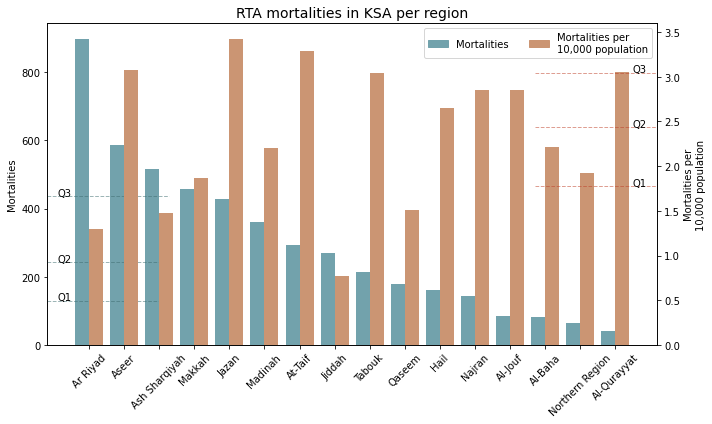

In [118]:
variable = 'Mortalities'
to_plot = ['Mortalities per 10,000 population','Number of Accidents including mortalities']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (10,24/4))
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax2 = ax.twinx()

width = 0.4
xticks = np.arange(len(overview))+1
ticks1 = xticks - (width/2)
ticks2 = xticks + (width/2)
xlabels = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,'NAME'].values

ax.bar(x = ticks1, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[1]],
       color = colors[1], width = width, zorder = 2)
ax2.bar(x = ticks2, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[0]],
       color = colors[2], width = width, zorder = 2)

ax.set_xticks(xticks)
ax.set_xticklabels(labels = xlabels, Rotation= 45)
ax.set_ylabel(variable)
ax2.set_ylabel(variable+' per\n10,000 population')

import matplotlib.patches as mpa
labels = [variable , variable+' per\n10,000 population']
legend_handels = []
for x in np.arange(len(labels)):
    legend_handels.append(mpa.Patch(color= colors[x+1], label=labels[x]))

plt.legend(handles=legend_handels, ncol = 2, loc = 1)

for i,q in zip([0.25,0.5,0.75], ['Q1','Q2','Q3']):
    ax.axhline(y = overview[to_plot[1]].quantile(i), color = colors[0], label = q,
               linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmax = 0.2)
    ax.annotate(text = q , xy=(0.5,overview[to_plot[1]].quantile(i)),ha='right')
    ax2.axhline(y = overview[to_plot[0]].quantile(i), color = colors[4], label = q,
                linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmin = 0.8)
    ax2.annotate(text = q , xy=(16.5,overview[to_plot[0]].quantile(i)),ha='left')

plt.title('RTA '+ variable.lower()+' in KSA per region', size =14)
plt.tight_layout()
plt.savefig('./output/New_'+ variable.lower() +'.jpg',dpi = 300)
plt.show()

## Involvment

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


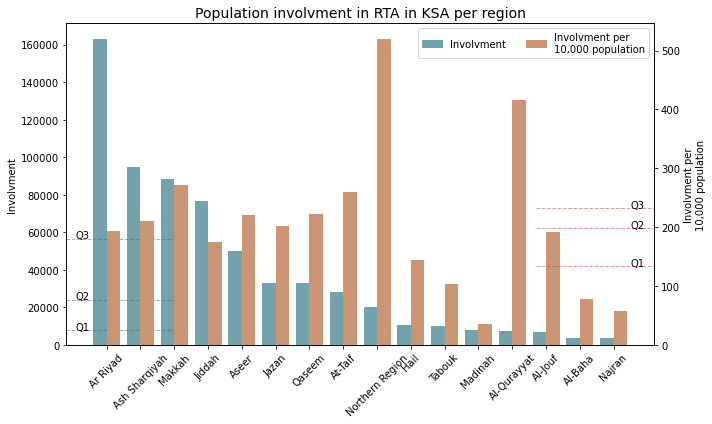

In [121]:
variable = 'Involvment'
to_plot = ['Involvment in traffic accidents per 10,000 population','Number of people involved in traffic accidents']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (10,24/4))
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax2 = ax.twinx()

width = 0.4
xticks = np.arange(len(overview))+1
ticks1 = xticks - (width/2)
ticks2 = xticks + (width/2)
xlabels = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,'NAME'].values

ax.bar(x = ticks1, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[1]],
       color = colors[1], width = width, zorder = 2)
ax2.bar(x = ticks2, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[0]],
       color = colors[2], width = width, zorder = 2)

ax.set_xticks(xticks)
ax.set_xticklabels(labels = xlabels, Rotation= 45)
ax.set_ylabel(variable)
ax2.set_ylabel(variable+' per\n10,000 population')

import matplotlib.patches as mpa
labels = [variable , variable+' per\n10,000 population']
legend_handels = []
for x in np.arange(len(labels)):
    legend_handels.append(mpa.Patch(color= colors[x+1], label=labels[x]))

plt.legend(handles=legend_handels, ncol = 2, loc = 1)

for i,q in zip([0.25,0.5,0.75], ['Q1','Q2','Q3']):
    ax.axhline(y = overview[to_plot[1]].quantile(i), color = colors[0], label = q,
               linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmax = 0.2)
    ax.annotate(text = q , xy=(0.5,overview[to_plot[1]].quantile(i)),ha='right')
    ax2.axhline(y = overview[to_plot[0]].quantile(i), color = colors[4], label = q,
                linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmin = 0.8)
    ax2.annotate(text = q , xy=(16.5,overview[to_plot[0]].quantile(i)),ha='left')

plt.title('Population '+ variable.lower() +' in RTA in KSA per region', size =14)
plt.tight_layout()
plt.savefig('./output/New_'+variable.lower()+'.jpg',dpi = 300)
plt.show()

## Incidences

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


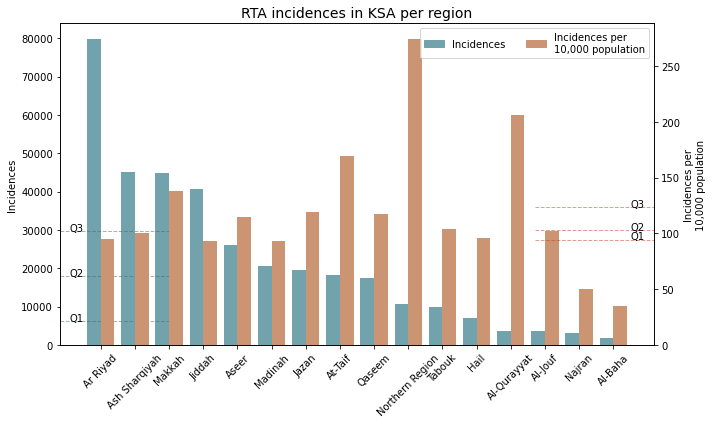

In [120]:
variable = 'Incidences'
to_plot = ['Accidents per 10,000 population','Number of traffic accidents']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (10,24/4))
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax2 = ax.twinx()

width = 0.4
xticks = np.arange(len(overview))+1
ticks1 = xticks - (width/2)
ticks2 = xticks + (width/2)
xlabels = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,'NAME'].values

ax.bar(x = ticks1, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[1]],
       color = colors[1], width = width, zorder = 2)
ax2.bar(x = ticks2, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[0]],
       color = colors[2], width = width, zorder = 2)

ax.set_xticks(xticks)
ax.set_xticklabels(labels = xlabels, Rotation= 45)
ax.set_ylabel(variable)
ax2.set_ylabel(variable+' per\n10,000 population')

import matplotlib.patches as mpa
labels = [variable , variable+' per\n10,000 population']
legend_handels = []
for x in np.arange(len(labels)):
    legend_handels.append(mpa.Patch(color= colors[x+1], label=labels[x]))

plt.legend(handles=legend_handels, ncol = 2, loc = 1)

for i,q in zip([0.25,0.5,0.75], ['Q1','Q2','Q3']):
    ax.axhline(y = overview[to_plot[1]].quantile(i), color = colors[0], label = q,
               linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmax = 0.2)
    ax.annotate(text = q , xy=(0.5,overview[to_plot[1]].quantile(i)),ha='right')
    ax2.axhline(y = overview[to_plot[0]].quantile(i), color = colors[4], label = q,
                linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmin = 0.8)
    ax2.annotate(text = q , xy=(16.5,overview[to_plot[0]].quantile(i)),ha='left')

plt.title('RTA '+ variable.lower()+' in KSA per region', size =14)
plt.tight_layout()
plt.savefig('./output/New_'+variable.lower()+'.jpg',dpi = 300)
plt.show()

In [108]:
overview.columns

Index(['NAME', 'TOTPOP_CY', 'x', 'y', 'Total injuries', 'Total mortalities',
       'Number of traffic accidents',
       'Number of people involved in traffic accidents',
       'Number of Accidents including damages',
       'Number of Accidents including injuries',
       'Number of Accidents including mortalities',
       'Percentage of Accidents including damages',
       'Percentage of Accidents including injuries',
       'Percentage of Accidents including mortalities',
       'Accidents per 10,000 population',
       'Involvment in traffic accidents per 10,000 population',
       'Injuries 10,000 population', 'Mortalities per 10,000 population',
       'geometry'],
      dtype='object')

## Percentage of accidents with injuries and mortalities

C:\Users\aaaa\anaconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


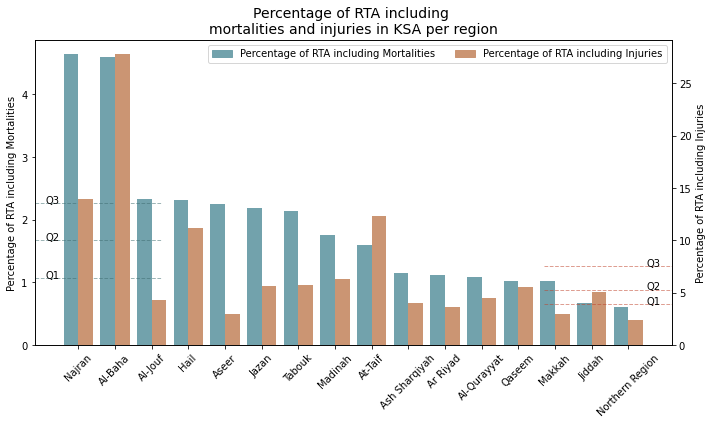

In [123]:
variable = 'Percentage of RTA including'
to_plot = ['Percentage of Accidents including injuries','Percentage of Accidents including mortalities']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (10,24/4))
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax2 = ax.twinx()

width = 0.4
xticks = np.arange(len(overview))+1
ticks1 = xticks - (width/2)
ticks2 = xticks + (width/2)
xlabels = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,'NAME'].values

ax.bar(x = ticks1, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[1]],
       color = colors[1], width = width, zorder = 2)
ax2.bar(x = ticks2, height = overview.sort_values(by = str(to_plot[1]), ascending=False).loc[:,to_plot[0]],
       color = colors[2], width = width, zorder = 2)

ax.set_xticks(xticks)
ax.set_xticklabels(labels = xlabels, Rotation= 45)
ax.set_ylabel(variable+' Mortalities')
ax2.set_ylabel(variable+' Injuries')

import matplotlib.patches as mpa
labels = [variable+' Mortalities' , variable+' Injuries']
legend_handels = []
for x in np.arange(len(labels)):
    legend_handels.append(mpa.Patch(color= colors[x+1], label=labels[x]))

plt.legend(handles=legend_handels, ncol = 2, loc = 1)

for i,q in zip([0.25,0.5,0.75], ['Q1','Q2','Q3']):
    ax.axhline(y = overview[to_plot[1]].quantile(i), color = colors[0], label = q,
               linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmax = 0.2)
    ax.annotate(text = q , xy=(0.5,overview[to_plot[1]].quantile(i)),ha='right')
    ax2.axhline(y = overview[to_plot[0]].quantile(i), color = colors[4], label = q,
                linewidth = 1, linestyle = '--', alpha = 0.5, zorder = 3, xmin = 0.8)
    ax2.annotate(text = q , xy=(16.5,overview[to_plot[0]].quantile(i)),ha='left')

plt.title(variable+' \nmortalities and injuries in KSA per region', size =14)
plt.tight_layout()
plt.savefig('./output/New_percentages.jpg',dpi = 300)
plt.show()

# Basic demographics

## importing and preparing the data

In [5]:
df_region = pd.read_csv('./df_regions.csv')
data = {'ID':['Injuries','Mortalities'],
        'Total':[df_region.sum_injuries.sum(),df_region.sum_dead.sum()],
        'Male':[df_region.male_injuries.sum(),df_region.male_dead.sum()],
        'Female':[df_region.female_injuries.sum(),df_region.female_dead.sum()],
       'Saudi':[df_region.injuries_saudi.sum(),df_region.dead_saudi.sum()],
       'Foreigner':[df_region.injuries_foreign.sum(),df_region.dead_foreign.sum()],
       'Urban':[df_region.urban_injuries.sum(),df_region.urban_dead.sum()],
       'Suburban':[df_region.suburban_injuries.sum(),df_region.suburban_dead.sum()]}
casualties = pd.DataFrame(data = data)
casualties.set_index('ID', inplace = True)
vars = list(casualties.columns[[1,2,3,4,5,6]])

## visualization

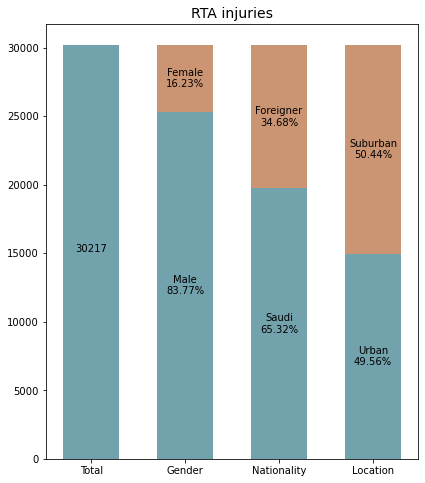

In [145]:
#fixed color

fig, ax = plt.subplots(figsize = (10/1.5,12/1.5))
colors = ['#3d6c6f','#72a2ac','#cb9573','#ef7b4f','#bf3f27']
ax.set_prop_cycle(color = colors )

ax.bar(zorder = 3, x = [1,2,2,3,3,4,4], height = [casualties.iloc[0,0],casualties.iloc[0,1],casualties.iloc[0,2],casualties.iloc[0,3],
                                casualties.iloc[0,4],casualties.iloc[0,5],casualties.iloc[0,6]],
       bottom = [0,0,casualties.iloc[0,1],0,casualties.iloc[0,3],0,casualties.iloc[0,5]],
      color=[colors[1],colors[1],colors[2],colors[1],colors[2],colors[1],colors[2]], width = 0.6)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Total', 'Gender','Nationality','Location'])
ax.set_title('RTA injuries', size = 14)
ax.annotate(text = str(int(casualties.iloc[0,0])), xy = (1,casualties.iloc[0,0]/2), ha='center')
for i in np.arange(len(vars)):
    if i%2 == 0:
        ax.annotate(text = vars[i]+'\n'+ str(np.round(100*casualties.iloc[0,i+1]/casualties.iloc[0,0],2))+"%" ,
                    xy = (np.floor(i/2)+2, casualties.iloc[0,i+1]/2), ha = 'center', va = 'center')
    else:
        ax.annotate(text = vars[i]+'\n'+ str(np.round(100*casualties.iloc[0,i+1]/casualties.iloc[0,0],2))+"%" ,
                    xy = (np.floor(i/2)+2, (casualties.iloc[0,i+1]/2)+casualties.iloc[0,i]),
                    ha = 'center', va = 'center')

#ax.grid(zorder = 0, axis = 'y', color = 'k', alpha = 0.4, linewidth = 0.5)
plt.savefig('./output/new_injuries_fixed_color.jpg', dpi = 300)
plt.show()

<function matplotlib.pyplot.show>

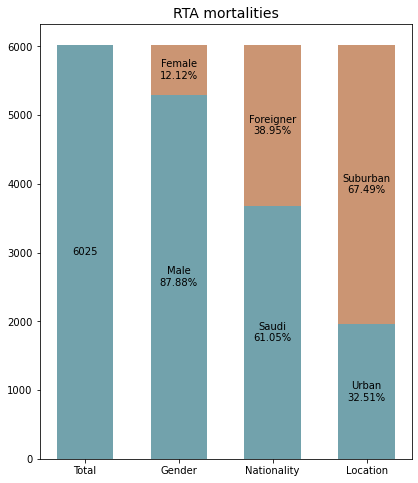

In [146]:
#fixed color

fig, ax = plt.subplots(figsize = (10/1.5,12/1.5))
ax.bar(zorder = 3, x = [1,2,2,3,3,4,4], height = [casualties.iloc[1,0],casualties.iloc[1,1],casualties.iloc[1,2],
                                                  casualties.iloc[1,3],
                                casualties.iloc[1,4],casualties.iloc[1,5],casualties.iloc[1,6]],
       bottom = [0,0,casualties.iloc[1,1],0,casualties.iloc[1,3],0,casualties.iloc[1,5]],
      color=[colors[1],colors[1],colors[2],colors[1],colors[2],colors[1],colors[2]], width = 0.6)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Total', 'Gender','Nationality','Location'])
ax.set_title('RTA mortalities', size = 14)
ax.annotate(text = str(int(casualties.iloc[1,0])), xy = (1,casualties.iloc[1,0]/2), ha='center', va = 'center')
for i in np.arange(len(vars)):
    if i%2 == 0:
        ax.annotate(text = vars[i]+'\n'+ str(np.round(100*casualties.iloc[1,i+1]/casualties.iloc[1,0],2))+"%" ,
                    xy = (np.floor(i/2)+2, casualties.iloc[1,i+1]/2), ha = 'center', va = 'center')
    else:
        ax.annotate(text = vars[i]+'\n'+ str(np.round(100*casualties.iloc[1,i+1]/casualties.iloc[1,0],2))+"%" ,
                    xy = (np.floor(i/2)+2, (casualties.iloc[1,i+1]/2)+casualties.iloc[1,i]),
                    ha = 'center', va = 'center')

#ax.grid(zorder = 0, axis = 'y', color = 'k', alpha = 0.4, linewidth = 0.5)
plt.savefig('./output/new_mortalities_fixed_colors.jpg', dpi = 300)
plt.show

## involvement data preperation

In [6]:
involved = df_region.loc[:,['region','sum_involved', 'involved_saudi', 'involved_foreign', 'involved_married',
                            'involved_single', 'involved_litrate', 'involved_illitrate','involved_0_18',
                            'involved_18_30', 'involved_30_40', 'involved_40_50',
                            'involved_50']].copy()
inv_sum = involved.append(involved.sum(numeric_only=True), ignore_index=True).drop(columns='region').iloc[-1,:-5]
inv_sum.index = ['Total number of involved', 'Saudi', 'Foreigner',
       'Married', 'Single', 'Litrate',
       'Illitrate']
vars = list(inv_sum.index[1:])
vars

['Saudi', 'Foreigner', 'Married', 'Single', 'Litrate', 'Illitrate']

## visualization

<function matplotlib.pyplot.show>

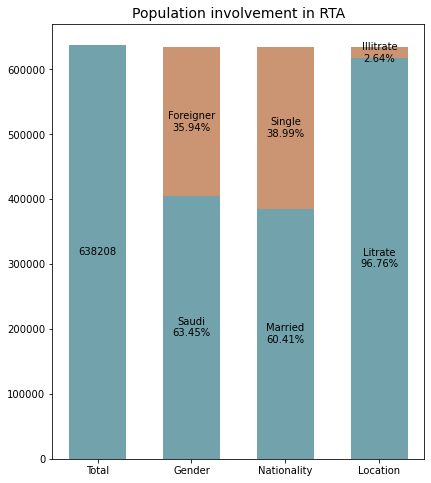

In [9]:
inv_sum.index = ['Total number of involved', 'Saudi', 'Foreigner',
       'Married', 'Single', 'Litrate',
       'Illitrate']
vars = list(inv_sum.index[1:])
vars

#fixed color

fig, ax = plt.subplots(figsize = (10/1.5,12/1.5))
ax.bar(zorder = 3, x = [1,2,2,3,3,4,4], height = [inv_sum.iloc[0],inv_sum.iloc[1],inv_sum.iloc[2],
                                                  inv_sum.iloc[3],
                                inv_sum.iloc[4],inv_sum.iloc[5],inv_sum.iloc[6]],
       bottom = [0,0,inv_sum.iloc[1],0,inv_sum.iloc[3],0,inv_sum.iloc[5]],
      color=[colors[1],colors[1],colors[2],colors[1],colors[2],colors[1],colors[2]], width = 0.6)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Total', 'Gender','Nationality','Location'])
ax.set_title('Population involvement in RTA', size = 14)
ax.annotate(text = str(int(inv_sum.iloc[0])), xy = (1,inv_sum.iloc[0]/2), ha='center', va = 'center')
for i in np.arange(len(vars)):
    if i%2 == 0:
        ax.annotate(text = vars[i]+'\n'+ str(np.round(100*inv_sum.iloc[i+1]/inv_sum.iloc[0],2))+"%" ,
                    xy = (np.floor(i/2)+2, inv_sum.iloc[i+1]/2), ha = 'center', va = 'center')
    else:
        ax.annotate(text = vars[i]+'\n'+ str(np.round(100*inv_sum.iloc[i+1]/inv_sum.iloc[0],2))+"%" ,
                    xy = (np.floor(i/2)+2, (inv_sum.iloc[i+1]/2)+inv_sum.iloc[i]),
                    ha = 'center', va = 'center')

#ax.grid(zorder = 0, axis = 'y', color = 'k', alpha = 0.4, linewidth = 0.5)
plt.savefig('./output/new_involved_fixed_colors.jpg', dpi = 300)
plt.show